<a href="https://colab.research.google.com/github/shun-lin/deep-synthetic-feature-engineering/blob/master/EDA_and_Synthetic_Feature_Engineering_Technique_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Packages and Datasets

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft

In [0]:
from google.colab import files
uploaded = files.upload()


Saving news_score.1csv.csv to news_score.1csv.csv


In [38]:
import io
#Fall 2018 Team 1 Data
df = pd.read_csv(io.BytesIO(uploaded['news_score.1csv.csv']))
df['ID'] = df.index
df.head()


,author,contents,description,publisher,source_url,title,date,time,Open,High,...,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf,ID
0,Bitcoinist.net,real time prices vires numeris bitcoin ethereu...,israel finance ministry bank israel considerin...,Bitcoinist.com,http://bitcoinist.com/kosher-crypto-bitcoen-se...,Kosher Crypto BitCoen Is Setting a Course for ...,2/2/18,0:00:08,8547.864403,8562.224306,...,433909.3344,2087.647258,96.0,0.0,3.0,-1.0,0.4,0.4,0.31545,0
1,Michelle Fox,var postloadfunctions var foresee enabled var ...,bitcoin may still drop rally back year early b...,CNBC,https://www.cnbc.com/2018/02/01/bitcoin-near-b...,"Bitcoin near bottom, will rally to $20,000 thi...",2/2/18,0:02:00,8547.864403,8562.224306,...,433909.3344,2087.647258,146.0,0.0,3.0,0.0,0.1,0.1,0.49858,1
2,Scott Scanlon,core cryptocurrency networks miners people use...,core cryptocurrency networks miners people use...,Youbrandinc.com,https://www.youbrandinc.com/crytocurrency/brai...,Brain Genius Submerges His Bitcoin Mining Rig ...,2/2/18,0:03:08,8547.864403,8562.224306,...,433909.3344,2087.647258,1181.0,0.0,-1.0,-1.0,0.4,0.4,0.31795,2
3,Bruce Kleinman,demons digital gold part already done please r...,demons digital gold part,Hackernoon.com,https://hackernoon.com/remediation-wherefore-a...,"Remediation, wherefore art thou?",2/2/18,0:18:34,8547.864403,8562.224306,...,433909.3344,2087.647258,452.0,0.0,3.0,0.0,0.2,0.2,0.97540,3
4,Jason Murphy,email password remember feb systems underpinni...,systems underpinning bitcoin truly revolutiona...,Crikey.com.au,https://www.crikey.com.au/2018/02/02/cryptotra...,Cryptotragedy: what if bitcoin’s greatest stre...,2/2/18,0:25:09,8547.864403,8562.224306,...,433909.3344,2087.647258,220.0,0.0,0.0,0.0,0.8,0.8,0.33696,4


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7054 entries, 0 to 7053
Data columns (total 25 columns):
author                 7054 non-null object
contents               7054 non-null object
description            7054 non-null object
publisher              7054 non-null object
source_url             7054 non-null object
title                  7054 non-null object
date                   7054 non-null object
time                   7054 non-null object
Open                   7054 non-null float64
High                   7054 non-null float64
Low                    7054 non-null float64
Close                  7054 non-null float64
Volume_(BTC)           7054 non-null float64
Volume_(Currency)      7054 non-null float64
Weighted_Price         7054 non-null float64
Average                7054 non-null float64
Volatility             7054 non-null float64
SD                     7054 non-null float64
publisherLabel         7054 non-null float64
Mark                   7054 non-null float64
p

In [0]:
df.describe()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf
count,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000
mean,8182.139135,8190.604925,8173.207231,8182.071572,25.751414,199728.969814,8181.904584,10701.182909,293362.833360,1411.442590,615.735753,-0.175787,1.412815,0.465126,0.053884,0.375801,0.407626
std,682.239671,678.133716,686.505293,682.132607,16.902330,110347.430735,682.283876,894.026932,116731.998826,561.627091,378.364278,0.529577,1.579945,1.260539,0.481763,0.273717,0.186565
min,6806.927451,6826.417535,6786.712438,6807.273597,9.265880,74305.946820,6806.651598,9786.788157,180619.004500,869.003591,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000,0.157630
25%,7905.440896,7917.342931,7892.443951,7905.416028,13.935292,121295.129200,7904.972491,10090.346930,192710.683500,927.179708,202.000000,0.000000,0.000000,-1.000000,-0.300000,0.200000,0.281280
50%,8310.115639,8313.456646,8306.793611,8310.097187,18.984345,154043.483800,8310.129580,10130.017600,231620.464900,1114.384481,643.000000,0.000000,2.000000,0.000000,0.000000,0.300000,0.329700
75%,8617.131229,8620.755771,8613.696326,8617.348722,35.615632,297975.902000,8617.210484,11592.976650,437801.267600,2106.372331,967.000000,0.000000,3.000000,1.000000,0.400000,0.600000,0.491838
max,9435.828417,9441.771257,9429.061993,9435.448514,63.421083,432929.362400,9435.411315,12603.493540,452638.412200,2177.757576,1186.000000,1.000000,3.000000,3.000000,0.900000,0.900000,1.633640


In [0]:
#EDA

Text(0, 0.5, 'Frequency')

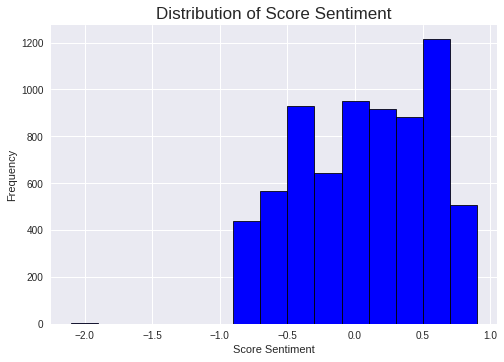

In [0]:
plt.hist(df['score_sentiment'], bins = np.arange(-2.1, 1, 0.2), color = 'blue', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of Score Sentiment', fontsize = 17)
plt.xlabel('Score Sentiment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

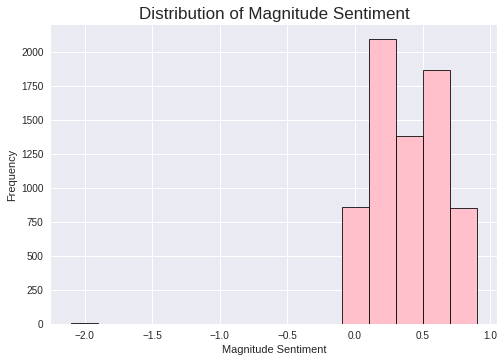

In [0]:
plt.hist(df['magnitude_sentiment'], bins = np.arange(-2.1, 1, 0.2), color = 'pink', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of Magnitude Sentiment', fontsize = 17)
plt.xlabel('Magnitude Sentiment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

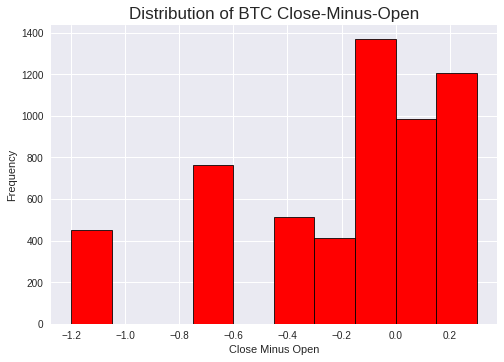

In [0]:
plt.hist(df['Close'] - df['Open'], bins = np.arange(-1.2, 0.4, 0.15), color = 'red', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of BTC Close-Minus-Open', fontsize = 17)
plt.xlabel('Close Minus Open')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

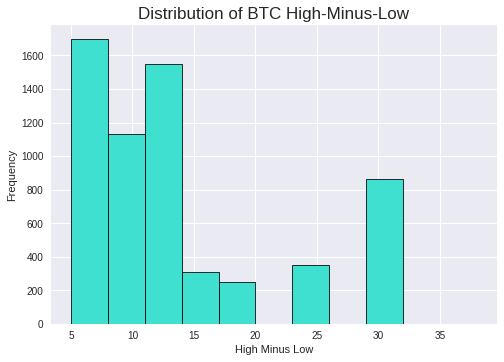

In [0]:
plt.hist(df['High'] - df['Low'], bins = np.arange(5, 40, 3), color = 'turquoise', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of BTC High-Minus-Low', fontsize = 17)
plt.xlabel('High Minus Low')
plt.ylabel('Frequency')

In [0]:
#Apply DFS Techniques

In [0]:
es = ft.EntitySet(id = 'df')



In [52]:
z = dict()
for x in df['title']:
  if x in z:
    z[x] += 1
  else:
    z[x] = 1
for x in z:
  if z[x] == 2:
     print(x)



Cryptocurrency prices plunge as regulators clamp down
'The Mother Of All Bubbles And Biggest Bubble in Human History Comes Down Crashing'
Ripple's XRP tumbles to its lowest price in months
OSC approves Canada’s first blockchain ETF
Ethereum sinks to its lowest level of 2018
Record highs, record heists: where is cryptocurrency heading?
Blockchain: an explainer
Japan's regulator urged Coincheck to fix flaws before $530 million cyber theft
CRYPTO INSIDER: Bitcoin stages a comeback
Bitcoin’s huge arbitrage play just vanished as Korea bubble pops
Bitcoin train goes off the rails, plunging below $8,500
Cryptocurrency tumble erases over $100bn from digital currency market
Teen Arrested for Creating Malware That Steals Cryptocurrency Wallet Passwords
Bitcoin leads cryptocurrency carnage, crashing below $8,000 for 1st time since November
Cryptocurrency Traders Lose $115 Billion in 24 Hours as Bitcoin Bloodbath Continues
Bitcoin price drops below $8,000 for first time since November 24
Bitcoin S

In [57]:
df[df['title'] == "'The Mother Of All Bubbles And Biggest Bubble in Human History Comes Down Crashing'"]["publisher_L"]

11     3.0
194    3.0
Name: publisher_L, dtype: float64

In [0]:
 es = es.entity_from_dataframe(entity_id = 'df', dataframe = df, 
                              index = 'ID', time_index = 'date')
  

In [48]:
df.iloc[0:10,5:15]

,title,date,time,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,Kosher Crypto BitCoen Is Setting a Course for ...,2/2/18,0:00:08,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
1,"Bitcoin near bottom, will rally to $20,000 thi...",2/2/18,0:02:00,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
2,Brain Genius Submerges His Bitcoin Mining Rig ...,2/2/18,0:03:08,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
3,"Remediation, wherefore art thou?",2/2/18,0:18:34,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
4,Cryptotragedy: what if bitcoin’s greatest stre...,2/2/18,0:25:09,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
5,Wolf Of Wall Street Says Bitcoin Could Hit $50...,2/2/18,0:49:21,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
6,More bad news pushes bitcoin’s value below $9000,2/2/18,1:03:11,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
7,"Bitcoin drops below key $9,000 level on Coinbase",2/2/18,1:40:17,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
8,Cryptocurrency prices plunge as regulators cla...,2/2/18,1:42:56,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042
9,Bitcoin price plunges as India announces ban o...,2/2/18,2:02:58,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042


In [59]:
features, feature_names = ft.dfs(entityset=es, target_entity='df',
                                 max_depth = 2)

features.head()

,author,publisher,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,...,WEEKDAY(date),WEEKDAY(time),NUMWORDS(contents),NUMWORDS(description),NUMWORDS(source_url),NUMWORDS(title),CHARACTERS(contents),CHARACTERS(description),CHARACTERS(source_url),CHARACTERS(title)
ID,,,,,,,,,,,,,,,,,,,,,
0,Bitcoinist.net,Bitcoinist.com,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,4,3,498,23,1,9,3923,189,66,52
1,Michelle Fox,CNBC,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,4,3,3346,14,1,12,18333,82,98,76
2,Scott Scanlon,Youbrandinc.com,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,4,3,207,23,1,13,1467,198,110,67
3,Bruce Kleinman,Hackernoon.com,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,4,3,979,4,1,4,7290,24,66,32
4,Jason Murphy,Crikey.com.au,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,4,3,241,24,1,11,1758,185,98,79
